## K-Means Clustering

K Means is an algorithm for **unsupervised clustering**: that is, finding clusters in data based on the data attributes alone (not the labels).

K Means is a relatively easy-to-understand algorithm.  It searches for cluster centers which are the mean of the points within them, such that every point is closest to the cluster center it is assigned to.

Let's look at how KMeans operates on the simple clusters we looked at previously. To emphasize that this is unsupervised, we'll not plot the colors of the clusters:

Populating the interactive namespace from numpy and matplotlib


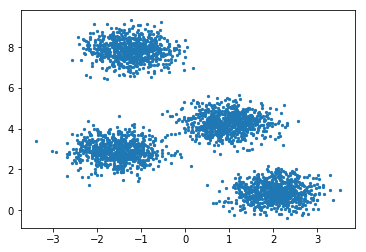

In [1]:
%pylab inline
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=3000, centers=4,
                  random_state=0, cluster_std=0.5)
scatter(X[:, 0], X[:, 1], s=5);

By eye, it is relatively easy to pick out the four clusters. If you were to perform an exhaustive search for the different segmentations of the data, however, the search space would be exponential in the number of points. Fortunately, there is a well-known *Expectation Maximization (EM)* procedure which scikit-learn implements, so that KMeans can be solved relatively quickly.

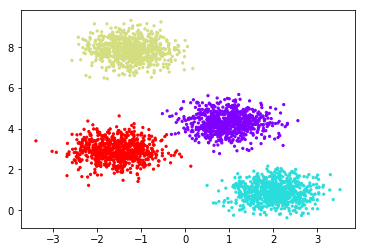

In [2]:
from sklearn.cluster import KMeans
tongji = KMeans(4)  # 4 clusters
tongji.fit(X)
y_kmeans = tongji.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=5, cmap='rainbow');

The algorithm identifies the four clusters of points in a manner very similar to what we would do by eye!

## The K-Means Algorithm: Expectation Maximization

K-Means is an example of an algorithm which uses an *Expectation-Maximization* approach to arrive at the solution.
*Expectation-Maximization* is a two-step approach which works as follows:

1. Guess some cluster centers
2. Repeat until converged
A. Assign points to the nearest cluster center
B. Set the cluster centers to the mean 
   
Let's quickly visualize this process:

In [3]:
def plot_kmeans_interactive(min_clusters=1, max_clusters=6):
    from ipywidgets import interact
    from sklearn.metrics.pairwise import euclidean_distances
    from sklearn.datasets.samples_generator import make_blobs

    with warnings.catch_warnings():
        warnings.filterwarnings('ignore')

        X, y = make_blobs(n_samples=300, centers=4,
                          random_state=0, cluster_std=0.60)

        def _kmeans_step(frame=0, n_clusters=4):
            rng = np.random.RandomState(2)
            labels = np.zeros(X.shape[0])
            centers = rng.randn(n_clusters, 2)

            nsteps = frame // 3

            for i in range(nsteps + 1):
                old_centers = centers
                if i < nsteps or frame % 3 > 0:
                    dist = euclidean_distances(X, centers)
                    labels = dist.argmin(1)

                if i < nsteps or frame % 3 > 1:
                    centers = np.array([X[labels == j].mean(0)
                                        for j in range(n_clusters)])
                    nans = np.isnan(centers)
                    centers[nans] = old_centers[nans]


            # plot the data and cluster centers
            plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='rainbow',
                        vmin=0, vmax=n_clusters - 1);
            plt.scatter(old_centers[:, 0], old_centers[:, 1], marker='o',
                        c=np.arange(n_clusters),
                        s=200, cmap='rainbow')
            plt.scatter(old_centers[:, 0], old_centers[:, 1], marker='o',
                        c='black', s=50)

            # plot new centers if third frame
            if frame % 3 == 2:
                for i in range(n_clusters):
                    plt.annotate('', centers[i], old_centers[i], 
                                 arrowprops=dict(arrowstyle='->', linewidth=1))
                plt.scatter(centers[:, 0], centers[:, 1], marker='o',
                            c=np.arange(n_clusters),
                            s=200, cmap='rainbow')
                plt.scatter(centers[:, 0], centers[:, 1], marker='o',
                            c='black', s=50)

            plt.xlim(-4, 4)
            plt.ylim(-2, 10)

            if frame % 3 == 1:
                plt.text(3.8, 9.5, "1. Reassign points to nearest centroid",
                         ha='right', va='top', size=14)
            elif frame % 3 == 2:
                plt.text(3.8, 9.5, "2. Update centroids to cluster means",
                         ha='right', va='top', size=14)

    
    return interact(_kmeans_step, frame=range(0,50),
                    n_clusters=range(min_clusters, max_clusters+1))

 # change frame to see the precedures step by step
plot_kmeans_interactive();

A Jupyter Widget

This algorithm will (often) converge to the optimal cluster centers.

### KMeans Caveats

* The convergence of this algorithm is not guaranteed; for that reason, by default scikit-learn uses a large number of random initializations and finds the best results.

* The number of clusters must be set beforehand.  There are other clustering algorithms for which this requirement may be lifted.